# 2nd part of the code: analyzing the clients that are churners.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
all_df = pd.read_csv('transactions_dataset.csv', sep=';')

df = pd.read_csv('customer_summary.csv')
df.drop(columns='Unnamed: 0', inplace=True)

In [3]:
churners = df[df['churner'] == True]

# Adding the relationship to client variable.

relations = pd.read_excel('sales_client_relationship_dataset.xlsx')

churners = churners.merge(relations, on='client_id', how='left')

In [4]:
# Aggregate order channels per client (unique values as a list)
order_channels = all_df.groupby('client_id')['order_channel'].unique().reset_index()

order_channels['order_channel'] = order_channels['order_channel'].apply(lambda x: ', '.join(map(str, x)))

# Merge with churners dataset
churners = churners.merge(order_channels, on='client_id', how='left')

churners['order_channel'] = churners['order_channel'].replace('by phone, at the store', 'at the store, by phone')

95% of Churners spend less than 500€ on average for each order.

In [5]:
churners_low_avg_money = churners[churners['avg_monetary'] < 500]

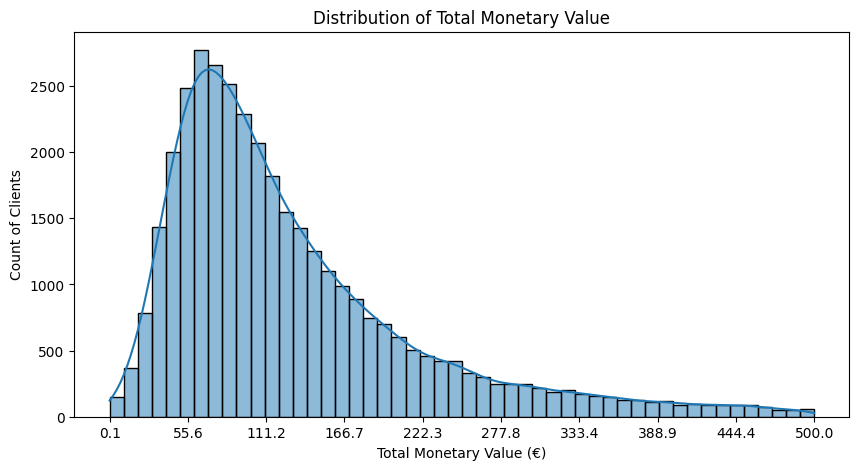

In [6]:
# Set figure size
plt.figure(figsize=(10, 5))

# Plot distribution using Seaborn
sns.histplot(churners_low_avg_money['avg_monetary'], bins=50, kde=True)

# Add labels and title
plt.xlabel("Total Monetary Value (€)")
plt.ylabel("Count of Clients")
plt.title("Distribution of Total Monetary Value")

# Define custom x-axis ticks
x_ticks = np.linspace(churners_low_avg_money['avg_monetary'].min(), churners_low_avg_money['avg_monetary'].max(), num=10)
plt.xticks(x_ticks.round(2))  # Round to 2 decimal places for readability

# Show plot
plt.show()


In [7]:
churners_high_avg_money = churners[(churners['avg_monetary'] > 500) & (churners['avg_monetary'] < 4000)]

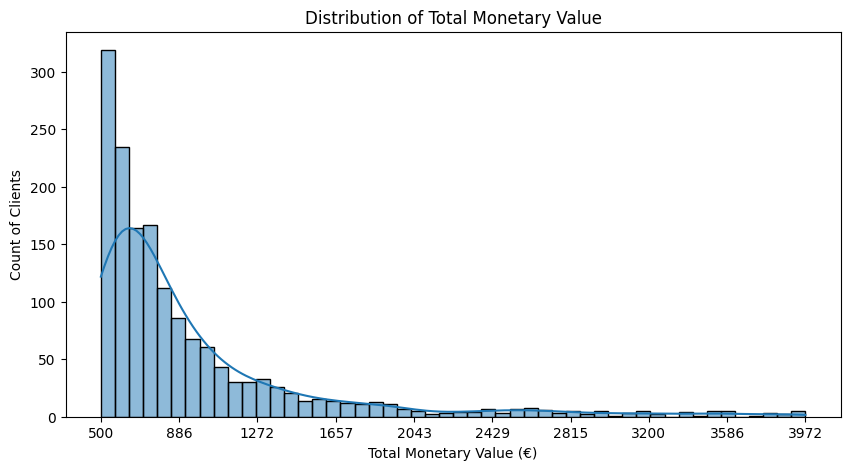

In [8]:
# Set figure size
plt.figure(figsize=(10, 5))

# Plot distribution using Seaborn
sns.histplot(churners_high_avg_money['avg_monetary'], bins=50, kde=True)

# Add labels and title
plt.xlabel("Total Monetary Value (€)")
plt.ylabel("Count of Clients")
plt.title("Distribution of Total Monetary Value")

# Define custom x-axis ticks
x_ticks = np.linspace(churners_high_avg_money['avg_monetary'].min(), churners_high_avg_money['avg_monetary'].max(), num=10)
plt.xticks(x_ticks.round(2))  # Round to 2 decimal places for readability

# Show plot
plt.show()


In [9]:
churners_spend_much_avg = churners[churners['avg_monetary'] > 5000]

In [10]:
churners_spend_much_avg['order_channel'].value_counts()

order_channel
by phone                  26
at the store, by phone    14
at the store               1
Name: count, dtype: int64

In [13]:
churners_spend_much_avg['quali_relation'].value_counts()

quali_relation
Difficult client    18
Demanding client    13
Agreeable client    10
Name: count, dtype: int64

In [14]:
churners_spend_much_avg.sort_values(by='avg_monetary')

,client_id,last_purchase,total_monetary,avg_monetary,frequency,recency,avg_time_gap,dynamic_threshold,churner,quali_relation,order_channel
27870,1679585,2018-08-09,30655,5109.206200,6,409,62.800000,188.400000,True,Agreeable client,by phone
17293,1050741,2019-05-14,56673,5152.097018,3,131,23.500000,70.500000,True,Demanding client,"at the store, by phone"
22452,1355783,2019-05-20,77884,5192.261960,4,125,24.666667,74.000000,True,Difficult client,by phone
10962,671026,2018-12-13,31216,5202.600000,3,283,74.000000,222.000000,True,Difficult client,by phone
36868,2218753,2019-07-03,176967,5204.924488,5,81,20.500000,61.500000,True,Agreeable client,by phone
7287,452896,2018-12-12,42120,5264.980600,6,284,75.400000,226.200000,True,Agreeable client,by phone
3381,209707,2018-01-23,15868,5289.448000,3,607,23.000000,69.000000,True,Demanding client,by phone
36206,2178449,2019-04-25,15978,5326.154978,3,150,24.000000,72.000000,True,Difficult client,by phone
22005,1329291,2018-12-06,37411,5344.373314,4,290,37.000000,111.000000,True,Agreeable client,by phone
18512,1125643,2019-05-10,290896,5594.160492,33,135,7.968750,23.906250,True,Difficult client,by phone
